In [253]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import consumer_key 
from config import consumer_secret 
from config import access_token 
from config import access_token_secret 

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [254]:
# Target User Accounts
target_user = ("@BBCWorld", "@CBSNews", "@CNN","@FoxNews", "@nytimes")

# Variables for holding sentiments
sentiments =[]

# Loop through all target users
for user in target_user:
    # Counter
    counter = 1
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for page in tweepy.Cursor(api.user_timeline, id=user).pages(5):

        # Loop through all tweets
        for tweet in page:
            #Run Vader Analysis on each tweet
            sentence =tweet._json["text"]
            compound = analyzer.polarity_scores(sentence)["compound"]
            pos = analyzer.polarity_scores(sentence)["pos"]
            neu = analyzer.polarity_scores(sentence)["neu"]
            neg = analyzer.polarity_scores(sentence)["neg"]
            
            #Tweet datetime object
            raw_time = tweet._json["created_at"]
            converted_time = datetime.strptime(raw_time, "%a %b %d %H:%M:%S %z %Y")

            # Store the Sentiments
            sentiments.append({"Media Sources": tweet._json["user"]["name"],
                "Compound":compound,
                "Positive": pos,
                "Neutral": neu,
                "Negative": neg,
                "Tweet Text" : sentence,
                "Datetime" : converted_time,
                "Tweets Ago": counter})
            
            # Add to counter 
            counter = counter + 1 

In [255]:
#Put all data into dataframe and export to csv file
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df = sentiments_df[['Media Sources','Datetime','Compound','Positive','Neutral','Negative','Tweet Text','Tweets Ago']]
sentiments_df.to_csv("Media Sentiment Analysis.csv")
sentiments_df.head()

,Media Sources,Datetime,Compound,Positive,Neutral,Negative,Tweet Text,Tweets Ago
0,BBC News (World),2018-03-24 01:22:13+00:00,0.0000,0.0,1.000,0.000,DR Congo to shun its own donor conference in G...,1
1,BBC News (World),2018-03-24 00:42:53+00:00,0.0000,0.0,1.000,0.000,A day in the life of India's 'tuberculosis war...,2
2,BBC News (World),2018-03-24 00:39:01+00:00,0.0000,0.0,1.000,0.000,The evolution of UK-Australia travel into a si...,3
3,BBC News (World),2018-03-23 23:33:03+00:00,-0.5994,0.0,0.698,0.302,Hamelin Bay: Nearly 150 beached whales die in ...,4
4,BBC News (World),2018-03-23 22:18:47+00:00,0.0000,0.0,1.000,0.000,Eye-witness says French hostage-taker ran afte...,5


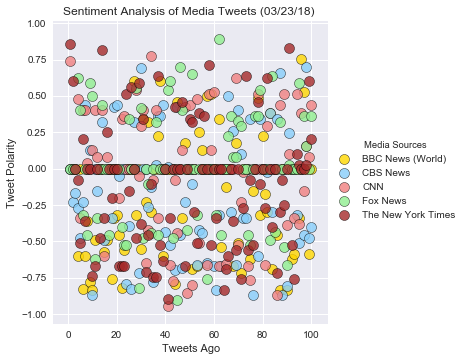

In [256]:
#Create bubble plot using seaborn and matplotlib libraries
my_color=["gold", "lightskyblue", "lightcoral","lightgreen","brown"]
sns.lmplot(x='Tweets Ago', y='Compound', data=sentiments_df,
           fit_reg=False,hue='Media Sources',palette=my_color,scatter_kws={"s":100,"alpha":0.8,"linewidth":.5,"edgecolors":'k'}) 
#Set title for the plot
ax = plt.gca()
ax.set_title("Sentiment Analysis of Media Tweets (%s) " % (time.strftime("%x")))
ax.set_ylabel("Tweet Polarity")
plt.savefig("SentimentAnalysisOfMediaTweets.png")
plt.show()

In [257]:
# Store the Average Sentiments
summary_df = sentiments_df.groupby('Media Sources', as_index=False).mean()
summary_df = summary_df[['Media Sources','Compound']]
summary_df

,Media Sources,Compound
0,BBC News (World),-0.153939
1,CBS News,-0.135924
2,CNN,-0.017875
3,Fox News,0.003026
4,The New York Times,-0.106876


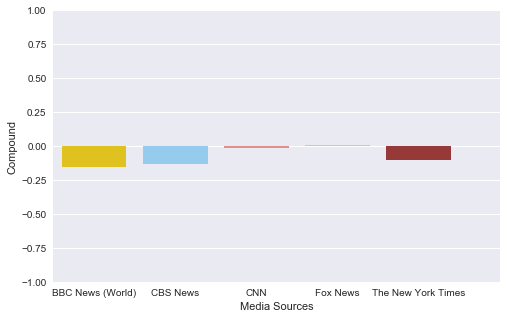

In [258]:
#Create bar plot using seaborn and matplotlib libraries
plt.figure(figsize=(8
                    ,5))
ax = sns.barplot(x=summary_df["Media Sources"], y=summary_df["Compound"], palette=my_color, data=summary_df,)

# Set x and y limits
# Set x and y limits
ax.set(xlim=(-0.5, len(x_axis)))
ax.set(ylim=(-1,1))
plt.savefig("OverallMediaSentiment.png")
plt.show()